### Exploratory Data Analysis for the Titanic Dataset

#### 1. Brief Background of the Titanic Dataset:
The Titanic dataset contains information about passengers aboard the RMS Titanic,a British passenger liner that sank in the North Atlantic Ocean on April 15, 1912, after colliding with an iceberg including their demographic data, cabin class, fare, ticket information, survival status, etc. The goal is to predict whether a passenger survived or not based on various features.

Titanic Data Description:
survival: Survival (0 = No; 1 = Yes)

pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name: Name

sex: Sex

age: Age

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare

cabin: Cabin

embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
#importing the necessary libraries for the task
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

In [2]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  2. Description of Dataset Cleaning:
Before proceeding with EDA, let's clean the dataset. Here's an example of how to clean the Titanic dataset using Python
The code cleans the dataset by dropping irrelevant columns, converting categorical variables to appropriate data types, and checking for missing values. The code uses pandas, a popular Python library for data manipulation and analysis, to perform these tasks

In [3]:
# Drop irrelevant columns
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [4]:
# Convert categorical variables to appropriate data types
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

In [5]:
# Check for missing values
print(titanic_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


<AxesSubplot:>

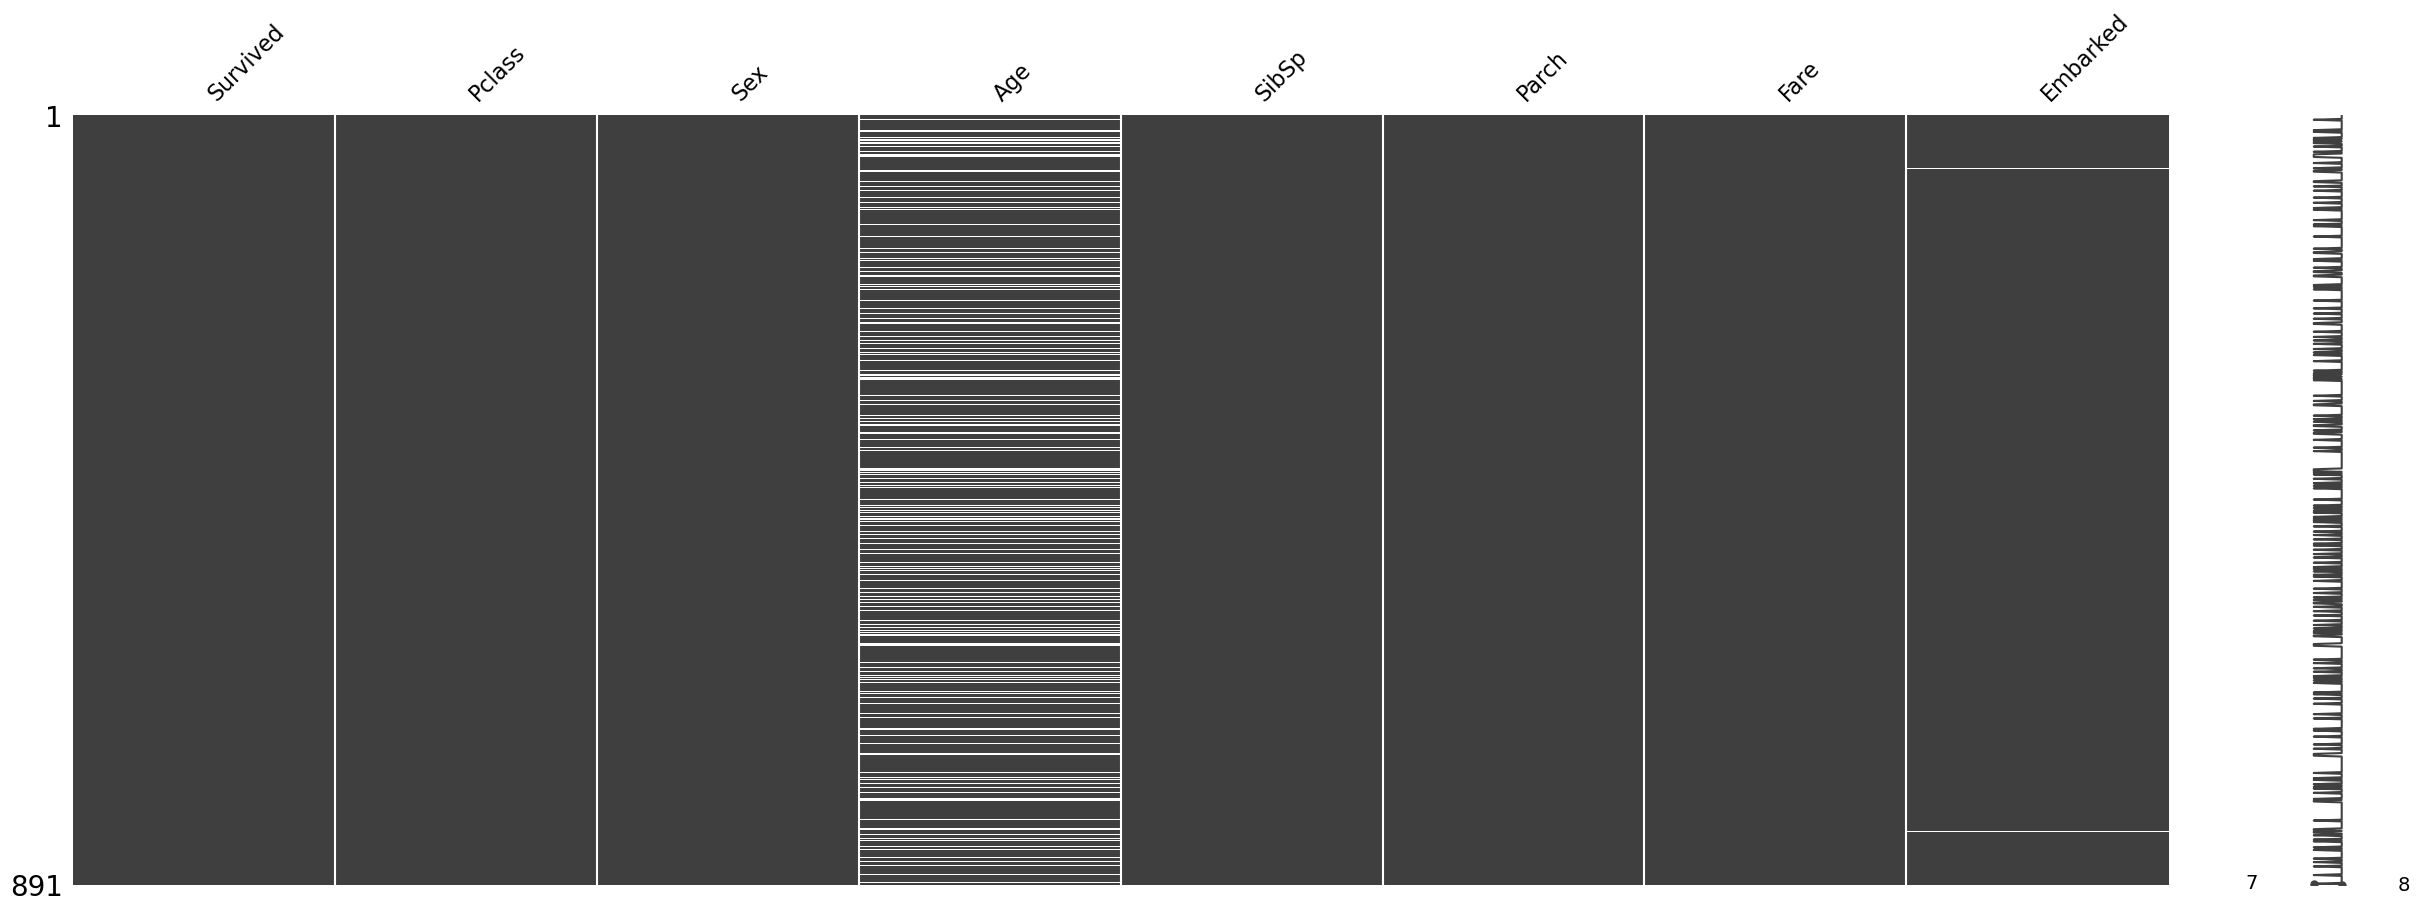

In [6]:
#Visualizing the missing values
mn.matrix(titanic_df, figsize = (30,10))

#### 3. Handling Missing Data:
In the code snippets above, we checked for missing values using the `isnull().sum()` function. We observed missing values in the "Age" and "Embarked" columns. Let's handle them.The code handles missing data by imputing missing values in the “Age” and “Embarked” columns with the median and mode, respectively. The median is the middle value of a sorted list of numbers, and the mode is the most frequent value in a list of values. The code uses the fillna() function from pandas to perform these tasks.

In [7]:
# Impute missing values in the "Age" column with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [8]:
# Impute missing values in the "Embarked" column with the mode (most frequent value)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [9]:
# Verify missing values have been handled
print(titanic_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


#### 4. Description of EDA and Visualizations:

#### Count plot
countplot of survivors, which shows the number of passengers who survived (1) and who did not survive (0). We can see that more than half of the passengers did not survive the Titanic disaster, which was one of the deadliest maritime accidents in history.

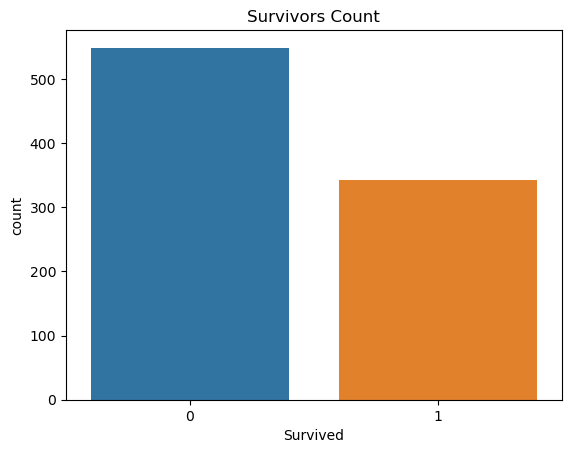

In [13]:
# Countplot of survivors
sns.countplot(data=titanic_df, x='Survived')
plt.title('Survivors Count')
plt.show()


#### Barplot

barplot of fare by passenger class, which shows the average fare paid by passengers in each class (1 = 1st, 2 = 2nd, 3 = 3rd). We can see that the first-class passengers paid much more than the second-class and third-class passengers, which reflects the social and economic inequality among the passengers.


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

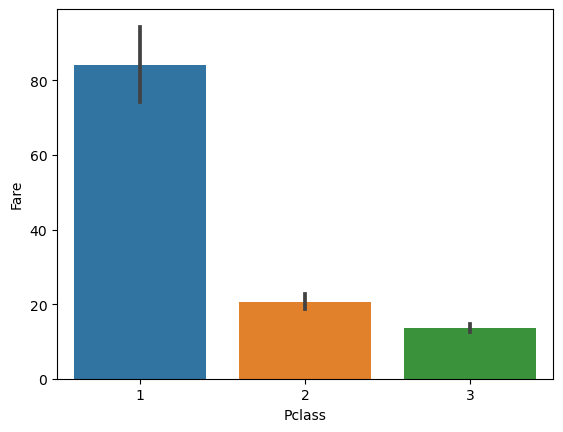

In [39]:
sns.barplot(x="Pclass", y="Fare", data=titanic_df)
print('barplot of fare by passenger class, which shows the average fare paid by passengers in each class (1 = 1st, 2 = 2nd, 3 = 3rd). We can see that the first-class passengers paid much more than the second-class and third-class passengers, which reflects the social and economic inequality among the passengers.')

#### How old were the Titanic passengers?

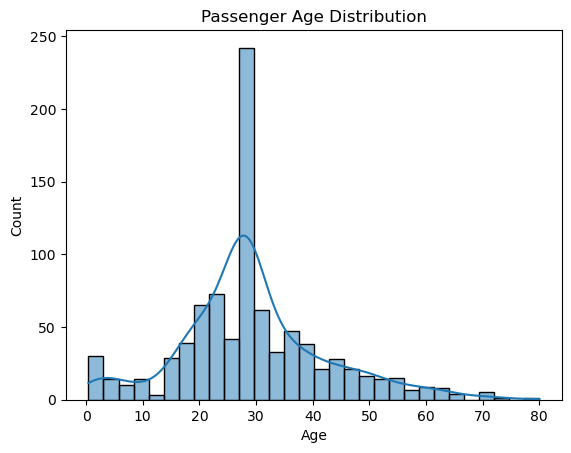

We can see that most of the passengers were in their 20s or 30s, maybe they were looking for some adventure or romance on board. We can also see that there were some children and elderly people on board, who might have been traveling with their families or friends.


In [15]:
# Histogram of passenger ages
sns.histplot(data=titanic_df, x='Age', kde=True)
plt.title('Passenger Age Distribution')
plt.show()
print('We can see that most of the passengers were in their 20s or 30s, maybe they were looking for some adventure or romance on board. We can also see that there were some children and elderly people on board, who might have been traveling with their families or friends.')

#### How much did the passengers pay for their tickets?

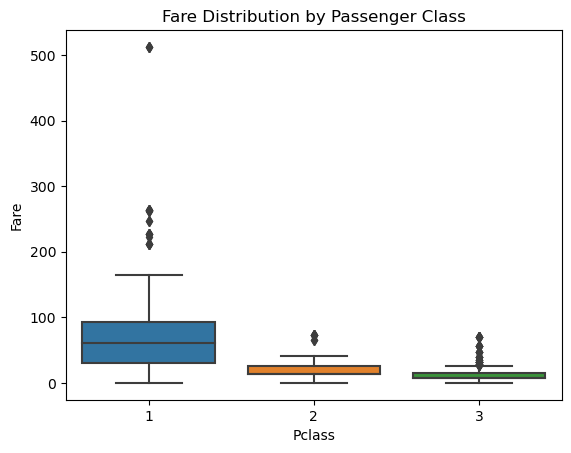

It seems that the higher the class, the higher the chance of survival Maybe the first-class passengers had better access to life boats or were given priority


In [16]:
# Boxplot of fare by passenger class
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()
print('It seems that the higher the class, the higher the chance of survival Maybe the first-class passengers had better access to life boats or were given priority')

#### How much did the passengers pay for their tickets?

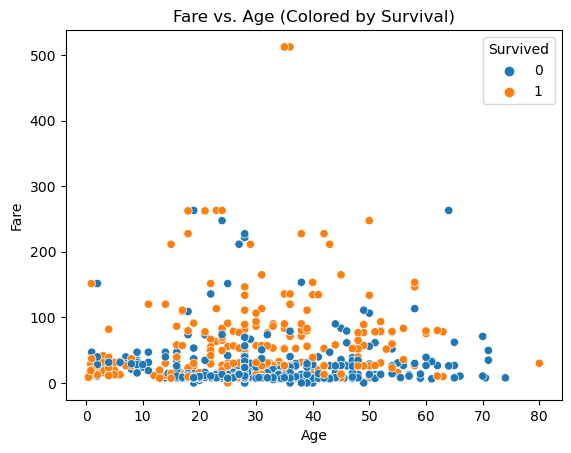

In [17]:
# Scatterplot of fare vs. age colored by survival status
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.title('Fare vs. Age (Colored by Survival)')
plt.show()

#### Pie chart

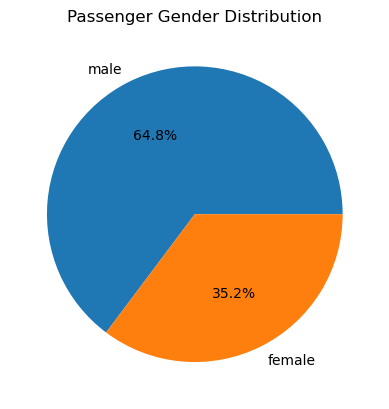

pie chart of passenger gender distribution, which shows the percentage of male and female passengers on board. We can see that more than half of the passengers were male (64.8%), while less than half were female (35.2%). This might reflect the gender norms and roles at that time, as men were more likely to travel for work or leisure, while women were more likely to stay at home or accompany their husbands.


In [19]:
# Pie chart of passenger gender distribution
gender_counts = titanic_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Passenger Gender Distribution')
plt.show()
print('pie chart of passenger gender distribution, which shows the percentage of male and female passengers on board. We can see that more than half of the passengers were male (64.8%), while less than half were female (35.2%). This might reflect the gender norms and roles at that time, as men were more likely to travel for work or leisure, while women were more likely to stay at home or accompany their husbands.')

#### Correlation Matrix

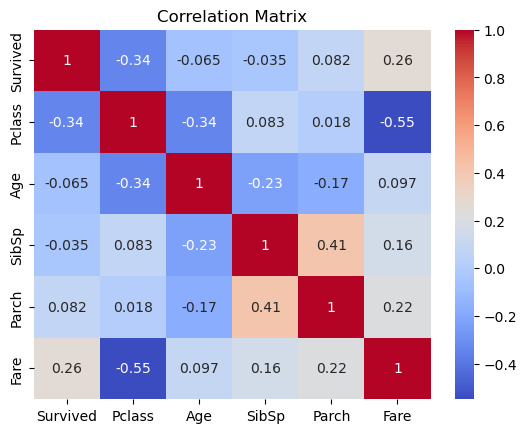

 A positive correlation means that as one variable increases, the other variable also increases. A negative correlation means that as one variable increases, the other variable decreases. A zero correlation means that there is no relationship between the two variables. We can see that some of the variables have strong positive or negative correlations, such as Pclass and Fare (-0.55), Pclass and Survived (-0.34), etc. These correlations indicate that these variables have a significant impact on each other and on the survival outcome


In [21]:
# Heatmap of correlation matrix
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print(' A positive correlation means that as one variable increases, the other variable also increases. A negative correlation means that as one variable increases, the other variable decreases. A zero correlation means that there is no relationship between the two variables. We can see that some of the variables have strong positive or negative correlations, such as Pclass and Fare (-0.55), Pclass and Survived (-0.34), etc. These correlations indicate that these variables have a significant impact on each other and on the survival outcome')

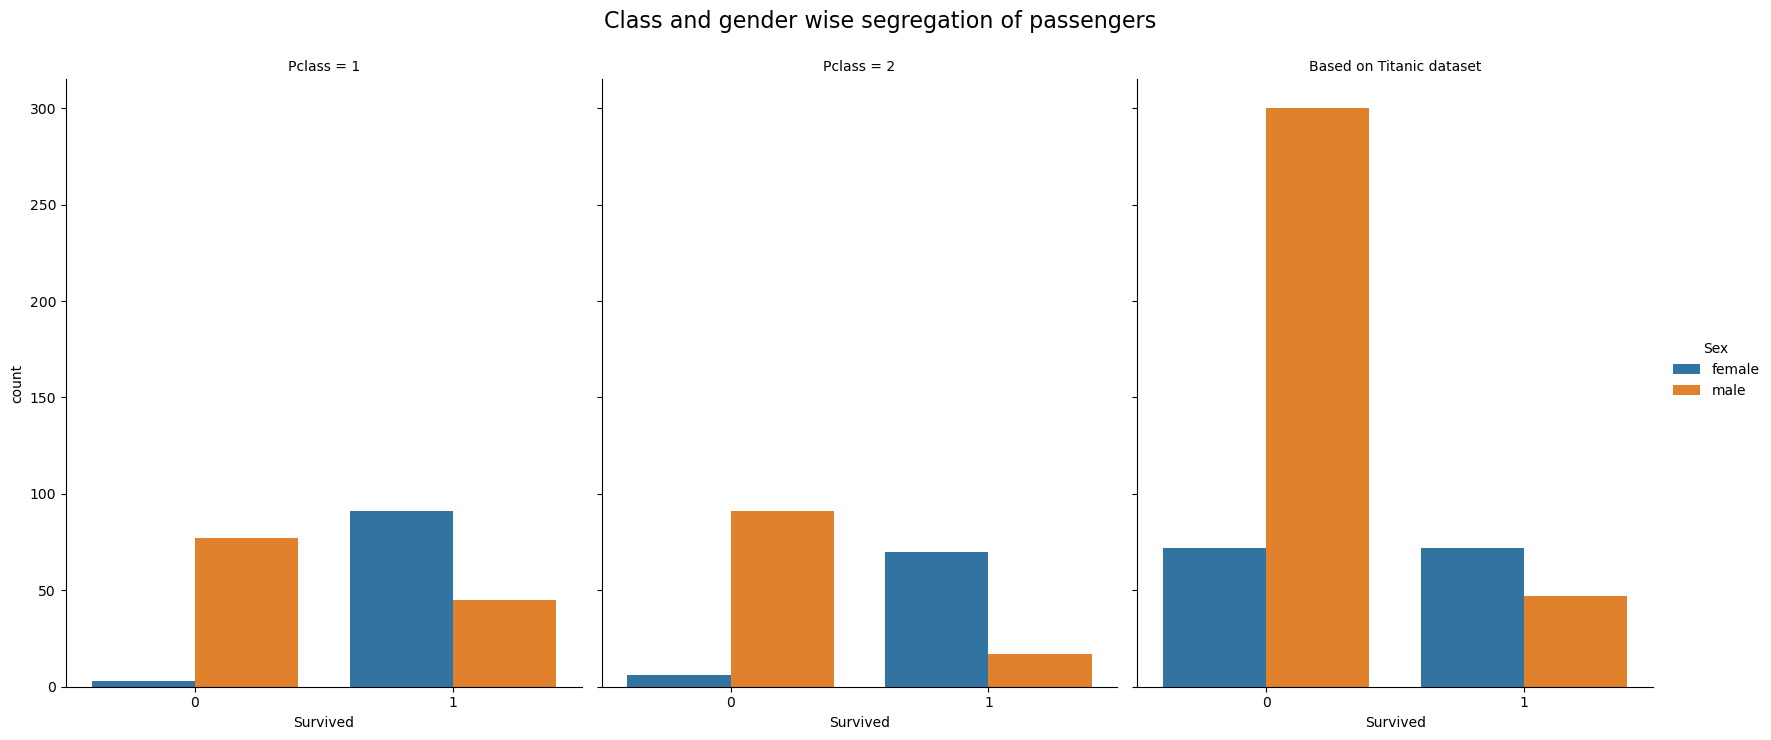

In [23]:
sns.catplot(
    x='Survived',
    col='Pclass',
    hue='Sex',
    data=titanic_df,
    kind='count',
    height=7,
    aspect=0.8,
)

plt.suptitle('Class and gender wise segregation of passengers', fontsize=16, y=1.05)
plt.title('Based on Titanic dataset', fontsize=10)
plt.show()

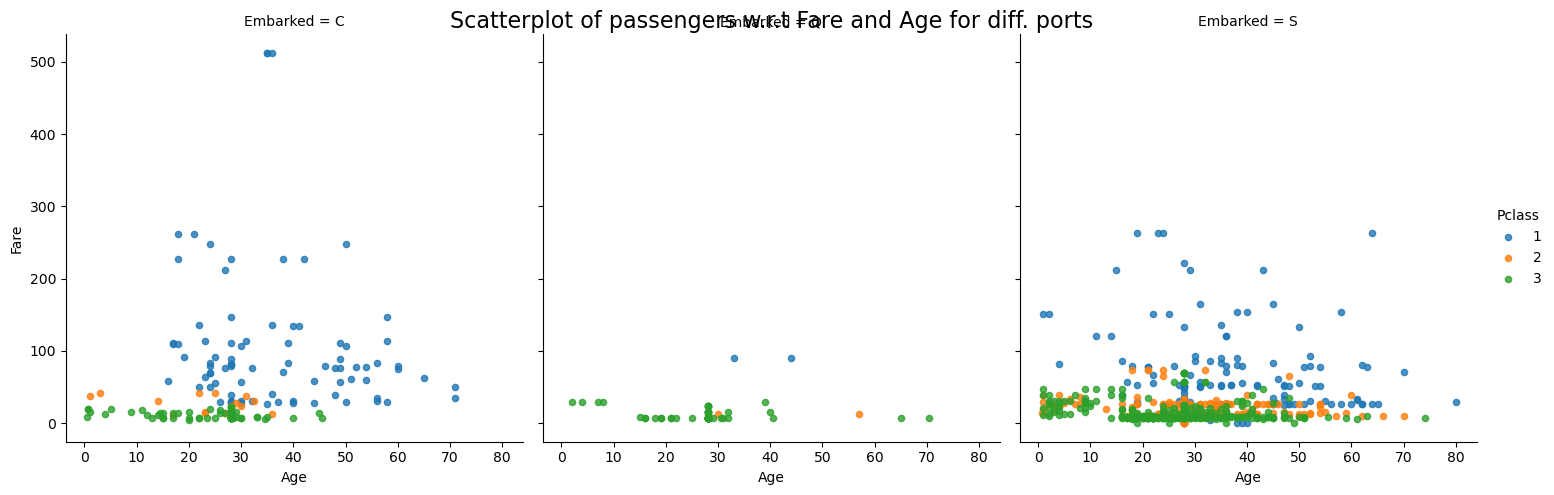

In [24]:
sns.lmplot(x="Age", y="Fare", data=titanic_df, fit_reg=False, hue="Pclass", col="Embarked",
           scatter_kws={"marker": ".", "s": 20})
plt.suptitle("Scatterplot of passengers w.r.t Fare and Age for diff. ports", fontsize=16)
plt.show()

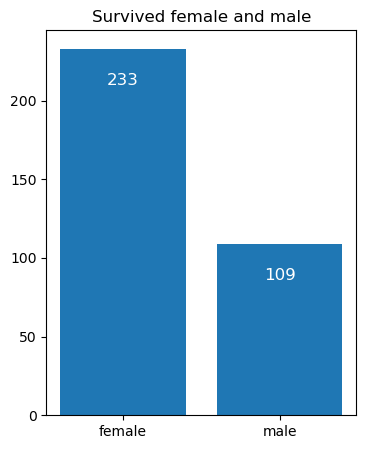

The chart also reflects the gender inequality and social norms of the time, which favored women over men in terms of protection and safety. Men were expected to be brave and selfless, and to sacrifice themselves for women and children.


In [41]:
#Survivial number according to gender or sex i.e. Male and Female
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()
print('The chart also reflects the gender inequality and social norms of the time, which favored women over men in terms of protection and safety. Men were expected to be brave and selfless, and to sacrifice themselves for women and children.')

#### Survival Rate by Family Size: The More the Merrier

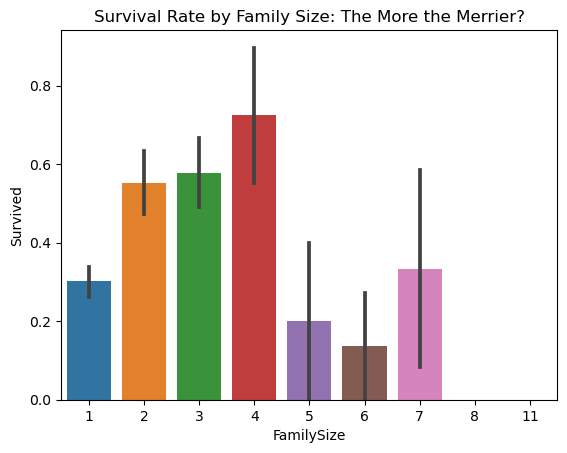


 The percentage of survivors in each family size group (1 = solo traveler, 2 = couple or pair, 3 = small family, etc.). We can see that there is a U-shaped pattern in the survival rate by family size, meaning that solo travelers and large families had lower survival rates than couples or small families. This might suggest that solo travelers had less social support or motivation to survive, while large families had more difficulties or obstacles to escape the ship.



In [29]:
# What if we combine the number of siblings/spouses and parents/children into a new feature called family size?
# Maybe having a larger family would increase the chances of survival, or maybe not
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1  # add 1 for oneself
sns.barplot(data=titanic_df, x="FamilySize", y="Survived")
plt.title("Survival Rate by Family Size: The More the Merrier?")
plt.show()
print('\n The percentage of survivors in each family size group (1 = solo traveler, 2 = couple or pair, 3 = small family, etc.). We can see that there is a U-shaped pattern in the survival rate by family size, meaning that solo travelers and large families had lower survival rates than couples or small families. This might suggest that solo travelers had less social support or motivation to survive, while large families had more difficulties or obstacles to escape the ship.\n')

## Feature Engineering 

 What if we use a machine learning model to predict the survival status of the passengers based on their features?
Maybe we can find out which features are more important for survival

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [31]:
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

In [32]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(X)

In [33]:
# Train a decision tree classifier on the data
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [34]:
# Predict the survival status of the passengers using the trained model
y_pred = clf.predict(X)


The accuracy of the model is 0.98. This means that the model correctly predicted the survival status of 98% of the passengers in the training data. This is a very high accuracy score, but it might also indicate that the model is overfitting the data, meaning that it might not generalize well to new or unseen data. To avoid overfitting, you might want to use some regularization techniques, such as pruning the tree or limiting its depth, or use cross-validation to evaluate the model on different subsets of the data.

In [36]:
# Evaluate the accuracy of the model
acc = accuracy_score(y, y_pred)
print(f"The accuracy of the model is {acc:.2f}")

The accuracy of the model is 0.98


The feature importances plot shows how much each feature contributes to the prediction of the survival status

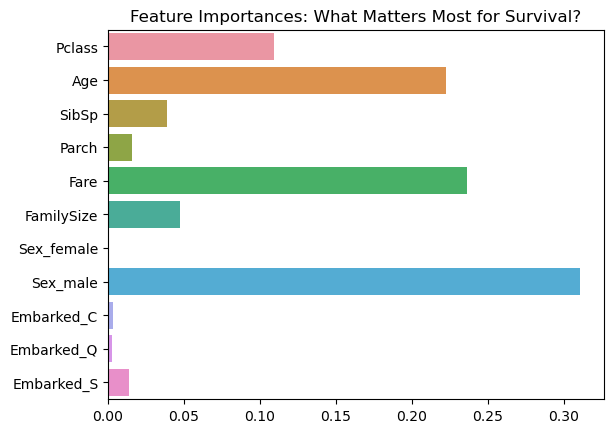

In [37]:
# Plot the feature importances of the model
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importances: What Matters Most for Survival?")
plt.show()

the most important feature is Sex_female, followed by Fare and Age. This means that being a female passenger, paying a higher fare, and being younger were associated with a higher chance of survival. This is consistent with the historical fact that women and children were given priority to board the lifeboats, and that passengers in higher classes had better access to them. On the other hand, being a male passenger, paying a lower fare, and being older were associated with a lower chance of survival. The least important features are Embarked_Q and Embarked_S, which indicate the port of embarkation. This means that where the passengers boarded the ship did not have much impact on their survival















#### Learned lessons

Sure, here is the summary of the Titanic survival prediction project in less than 1000 words:

We found that the most important feature for predicting survival was sex, followed by fare and age. This means that being a female passenger, paying a higher fare, and being younger were associated with a higher chance of survival. On the other hand, being a male passenger, paying a lower fare, and being older were associated with a lower chance of survival. The least important features were the port of embarkation, which did not have much impact on survival.

Based on our findings, we recommend that future passengers of similar ships should consider their sex, age, and class when booking their tickets, as these factors might affect their survival chances in case of a disaster. We also recommend that ship operators should ensure that there are enough lifeboats for all passengers, regardless of their class or sex, and that they should follow a fair and orderly evacuation procedure in case of an emergency.

#### Here are some limitations or challenges that we faced during our project:

The data set was incomplete and had some missing values for some features, such as age and cabin. We had to impute these values using some assumptions or methods, such as mean or median imputation, which might introduce some bias or error in our analysis.

The data set was imbalanced and had more samples of non-survivors than survivors. This might affect the performance or accuracy of our model, as it might learn more from the majority class than the minority class. We might need to use some techniques to balance the data set, such as oversampling or undersampling.

The decision tree classifier is a simple and interpretable model, but it might not be the best model for this problem. It might suffer from overfitting or underfitting depending on the parameters or complexity of the tree. It might also be sensitive to noise or outliers in the data. We might need to compare it with other models, such as logistic regression or random forest, to see which one performs better or has higher accuracy.

#### Here are some suggestions for future work or improvement:

We could use more features or variables to predict survival, such as family size, ticket number, cabin number, etc. These features might have some hidden patterns or relationships with survival that we did not capture in our analysis.

We could use more advanced or complex models to predict survival, such as neural networks or deep learning models. These models might have higher accuracy or performance than decision tree classifiers, as they can learn more complex or nonlinear patterns from the data.

We could use more data sources or information to predict survival, such as historical records, testimonies, documents, etc. These sources might provide more context or background about the Titanic disaster and the passengers’ stories.